General
-------

This is a basic Python coding exercise. In order to properly solve this,
you would need some understanding on how URLs are built and how links work.

Given a URL, you need to generate the following:
1.) The Top Level Domain (TLD) of this URL.
2.) The domain of this URL.
3.) The hostname of this URL.
4.) The path of this URL.
5.) All the links (both statically clickable & statically unclickable but dynamically generated) found on the page this URL points to, arranged in the following:
    a.) Links that belong to the same hostname.
    b.) Links that belong to the same domain, but different hostname.
    c.) Links that belong to a different domain.

Eg:

INPUT: yourscript.py http://test.testdomain.org/xyz

OUTPUT:
    TLD: org
    DOMAIN: testdomain.org
    HOSTNAME: test.testdomain.org
    PATH: /xyz
    LINKS:
        Same hostname:
            http://test.testdomain.org/abc
            http://test.testdomain.org/ddff
        Same domain:
            http://test3.testdomain.org/
            http://x.testdomain.org/abc
        Different domain:
            http://ddfgc.com/abc


Submission format
-----------------

Please submit your Python script. It must be compatible with Python 3.5 and higher.



In [331]:
from url_parser import parse_url
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

url = 'https://nomdeplume4reb.github.io/portfolio/'

#use url_parser library to parse parts of give url
parsed = parse_url('https://nomdeplume4reb.github.io/portfolio/')

#covert none types to empty string
convert_None = lambda i : i or ''

#create variables for parts of url
tld = parsed['top_domain']
domain = parsed['domain']+'.'+parsed['top_domain']

#because 'hostname' is not included in url_parser library, I have to 
sub = ''
if parsed['sub_domain'] == None:
    sub = ''
else: 
    sub = '.'
hostname = convert_None(parsed['sub_domain'])+sub+parsed['domain']+'.'+parsed['top_domain']

path = parsed['path']
links_list = []
same_hostname = []
same_domain = []
different_domain = []

#set up a dictionary to output formated results:
links = {'Same hostname': same_hostname, 'Same domain': same_domain, 'Different domain': different_domain}
parsed_url = {'TLD': tld, 'DOMAIN': domain, 'HOSTNAME': hostname, 'PATH': path, 'LINKS': links}

#use selenium to scrape the (possibly dynamic) website for links on page and append them to links_list
driver = webdriver.Chrome("C:\\Users\\rache\\Downloads\\chromedriver_win32\\chromedriver.exe")

driver.get(url)

continue_link = driver.find_element_by_tag_name('a')
elems = driver.find_elements_by_xpath("//a[@href]")
for elem in elems:
    links_list.append(elem.get_attribute("href"))
driver.quit()

# sort links according to same_domain, same_host, or different_domain
for link in links_list:
    if domain in link:
        same_domain.append(link)
    elif hostname in link:
        same_hostname.append(link)
    else:
        different_domain.append(link)

#output is the dictionary parsed_url
print(parsed_url)

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


General
-------

This is an intermediate Python coding exercise. In order to properly solve this,
you would need some understanding on how to optimize your code.

In the same folder as this question is the file data.json. That is the input that you will use for this exercise.

This exercise is composed of 3 parts, and is separated to 1, 2 & 3 below. While there are 3 parts,
we are only expecting one Python script as your submission.

Parts 1 & 2 would need to be answered by a single Python script.
Part 3 can be an explanation, or you may submit a Python script that illustrates your point.

Given the file data.json as your input, perform the following:

1. Create a CSV file, with a header, that contains the fullname, age, address and occupation.
	- Note: fullname is in "Firstname Lastname: format)
2. Generate statistics (in JSON format) using the following criteria and answers the following questions:
	- Use the lastname as the key.
	- How many people have the same last name?
	- How many different ages are there?
	- How many different occupations?
	
	- The output should look like:
		{
			'lastname1': {
				'count': number_of_people,
				'age': {
					'age1': occurence,
					'age2': occurence
				},
				'address': {
					'address1': occurence,
					'address2': occurence
				},
				'occupation': {
					'job1': occurence
				}
			}
		}

3. Imagine you are now given 20 JSON inputs. How will you minimize the runtime for the above tasks?


Submission format
-----------------

Please submit your Python script that produces an answer to parts 1 & 2. It must be compatible with Python 3.5 and higher.

For part 3, you may submit an explanation, or another Python script with an explanation to illustrate your point.


In [17]:
import pandas as pd
import json

#1. Create a CSV file, with a header, that contains the fullname, age, address and occupation.

data = pd.read_json (r'C:/Users/rache/Downloads/Junior Content Analyst/exercise2/data.json')
df = data.transpose().rename_axis('fullname').reset_index()
df.to_csv (r'C:/Users/rache/Downloads/Junior Content Analyst/exercise2/data.csv', index = None)

#2. Generate statistics (in JSON format)

# new data frame with split value columns
new = df["fullname"].str.split(" ", expand = True)
  
# making separate firstname and lastname columns from new data frame
df["firstname"]= new[0]
df["lastname"]= new[1]

#drop fullname and lastname columns
df = df.drop(columns=['fullname', 'firstname'])

#get counts for each lastname
s = df.groupby(['lastname']).size()

#create dataframe of counts for each variable grouped by lastname
df2 = df.melt(id_vars=["lastname"])
df2 = df2.groupby(['lastname', 'variable', 'value'], as_index = False).size()

#set up dictionary with keys for count, age, address, occupation
stats_dict = {}

for i, v in s.items():
    stats_dict.update({i: {'count': v, 'age': {}, 'address': {}, 'occupation': {}}})

#update dictionary with counts from dataframe
for index, row in df2.iterrows():
    stats_dict[row['lastname']][row['variable']].update({row['value']:row['size']})

#convert to json    
stats_json = json.dumps(stats_dict, indent = 4)

print(stats_json)

{
    "Kennedy": {
        "count": 15,
        "age": {
            "27": 1,
            "29": 1,
            "30": 1,
            "32": 2,
            "35": 1,
            "37": 1,
            "41": 1,
            "42": 1,
            "43": 1,
            "44": 1,
            "45": 1,
            "47": 1,
            "50": 1,
            "54": 1
        },
        "address": {
            "Lapland": 6,
            "Oulu": 3,
            "Tampere": 3,
            "Turku": 3
        },
        "occupation": {
            "Analyst": 4,
            "Doctor": 4,
            "Nurse": 1,
            "Programmer": 2,
            "Researcher": 4
        }
    },
    "Munoz": {
        "count": 16,
        "age": {
            "21": 2,
            "24": 2,
            "26": 1,
            "28": 1,
            "34": 1,
            "42": 4,
            "45": 2,
            "47": 1,
            "52": 1,
            "53": 1
        },
        "address": {
            "Helsinki": 4,
            "La

In [16]:
import pandas as pd
import json

#3. Imagine you are now given 20 JSON inputs. How will you minimize the runtime for the above tasks?

#I'm assuming all 20 JSON inputs already have the same format.

#create function to repeat for more JSON inputs. The function accepts a list of file paths

def get_stats_json(filepathlist):
    # read folder where jsons are located
    
    #set up dictionary with keys for count, age, address, occupation
    stats_dict = {}
        
    for filepath in filepathlist:
        #repeat steps above
        data = pd.read_json (filepath)
        df = data.transpose().rename_axis('fullname').reset_index()

        #2. Generate statistics (in JSON format)

        # new data frame with split value columns
        new = df["fullname"].str.split(" ", expand = True)

        # making separate firstname and lastname columns from new data frame
        df["firstname"]= new[0]
        df["lastname"]= new[1]
        del new
        #drop fullname and lastname columns
        df = df.drop(columns=['fullname', 'firstname'])

        #get counts for each lastname
        s = df.groupby(['lastname']).size()

        #create dataframe of counts for each variable grouped by lastname
        df2 = df.melt(id_vars=["lastname"])
        df2 = df2.groupby(['lastname', 'variable', 'value'], as_index = False).size()

        for i, v in s.items():
            stats_dict.update({i: {'count': v, 'age': {}, 'address': {}, 'occupation': {}}})

        #update dictionary with counts from dataframe
        for index, row in df2.iterrows():
            stats_dict[row['lastname']][row['variable']].update({row['value']:row['size']})
    
    stats_json = json.dumps(stats_dict, indent = 4)
    print(stats_json)
    
path = ['C:/Users/rache/Downloads/Junior Content Analyst/exercise2/data.json']
get_stats_json(path)

# I reduce runtime by keeping most variables local within the function and avoid slower loops like while

{
    "Kennedy": {
        "count": 15,
        "age": {
            "27": 1,
            "29": 1,
            "30": 1,
            "32": 2,
            "35": 1,
            "37": 1,
            "41": 1,
            "42": 1,
            "43": 1,
            "44": 1,
            "45": 1,
            "47": 1,
            "50": 1,
            "54": 1
        },
        "address": {
            "Lapland": 6,
            "Oulu": 3,
            "Tampere": 3,
            "Turku": 3
        },
        "occupation": {
            "Analyst": 4,
            "Doctor": 4,
            "Nurse": 1,
            "Programmer": 2,
            "Researcher": 4
        }
    },
    "Munoz": {
        "count": 15,
        "age": {
            "21": 2,
            "24": 2,
            "28": 1,
            "34": 1,
            "42": 4,
            "45": 2,
            "47": 1,
            "52": 1,
            "53": 1
        },
        "address": {
            "Helsinki": 4,
            "Lapland": 2,
          

General
-------

This is an exercise to test your ideas for content classification.
In order to properly solve this, you would need to be able to parse an HTML file.

This exercise has 2 parts:
Part 1 - Generating the dictionary of keywords.
Part 2 - Using the dictionary of keywords to classify a website.

Part 1
1. Hunt for as much websites as you can that you can classify as a Gambling site. These have to be websites in the English language, and you can look for as many websites as possible. List the URLs of the websites in a text file.
Eg:
	text file contains:
		http://site1.gambling
		http://sportsbetting.tld
		http://bettingtips.blog/a.html


2. Using the text file you generated above, create a Python script that will visit those websites, parse out the keywords and generate a dictionary of Gambling-related terms. This dictionary can be any file format (text, json, csv, etc.) that you will be using in Part 2. You can use any method that you deem necessary to generate the appropriate keywords.
	- INPUT: yourscript1.py <the text file with the gambling URLs>
	- OUTPUT: dictionary file

Part 2
Using the dictionary from Part 1, create a Python script that will expect a URL input, and then generate a classification if it's a Gambling site or not.
	- INPUT: yourscript2.py <Any URL>
	- OUTPUT1: Gambling site
	- OUTPUT2: Non-Gambling site

Submission format
-----------------
There are 4 expected submissions:
- The URL list generated in Part 1 - 1.
- The Python script in Part 1 - 2.
- The dictionary generated from Part 1 - 2.
- The Python script from Part 2.

The Python scripts must be compatible with Python 3.5 and higher.


In [215]:
#PART ONE
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd

#text file with list of known gambling sites:
file = 'C:/Users/rache/Downloads/Junior Content Analyst/exercise3/gamblingsites.txt'

#create dataframe from text file
sites_df = pd.read_csv(file, delimiter = "\t", header=None)

sites_df.columns = ['site']

#iterate over dataframe to get the content of each site and input into content column
content = []

for index, row in sites_df.iterrows():
    url = row.site
    #insert chrome file path!
    driver = webdriver.Chrome("C:\\Users\\rache\\Downloads\\chromedriver_win32\\chromedriver.exe")
    driver.get(url)
    body = driver.find_elements_by_css_selector("body")
    for elem in body:
        text = elem.text
        content.append(text)
    driver.quit()

sites_df['content'] = content

print(sites_df)

#saving file so I don't have to scrape each time
sites_df.to_csv(r'C:/Users/rache/Downloads/Junior Content Analyst/exercise3/gambling-sites-text.csv', index = None)


In [225]:
# Python program to generate WordCloud
  
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud_obj = pd.DataFrame()

#remove html tags for word cloud
wordcloud_obj['description'] = content

print(wordcloud_obj.head())

                                         description
0  Sportsbook\nLive Betting\nCasino\nRacing\nLogi...
1  PROMOTIONS\nGAMES\nABOUT US\nBANKING\nFAQ\nCON...
2  Email\nPassword\nLOG IN\nSIGN UP\nHELP\nQUICK ...
3  DAILY FANTASY SPORTS\nFOR THE REST OF US\nInst...
4  Established 1983\nLog In Sign Up\nSPORTSBOOK\n...


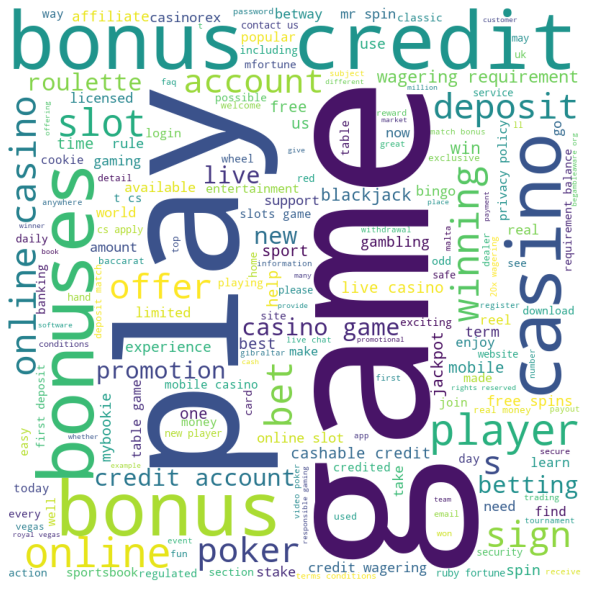

In [228]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)

#remove superfluous words like "will"
wordcloud_obj['description'] = wordcloud_obj['description'].replace({'will':' '}, regex=True)
  
# iterate through the csv file
for val in wordcloud_obj.description:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [312]:
#creating lists and dictionaries from words in content columns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#download nltk stopwords as needed: nltk.download('punkt')

#create string from content column
content_words = ' '.join(content)

content_words = re.sub('[^0-9a-zA-Z]+', ' ', content_words)

#download stopwords (e.g. 'the', 'will') from nltk so they can be filtered from list
stop_words = set(stopwords.words('english'))

#tokenizing words into list and filtering out stopwords
word_tokens = word_tokenize(content_words)

filtered_list = [w for w in word_tokens if not w in stop_words]

filtered_list = []

for w in word_tokens:
    if w not in stop_words:
        filtered_list.append(w)

# Converts each token into lowercase
for i in range(len(filtered_list)):
        filtered_list[i] = filtered_list[i].lower()

#creating dictionary as required by assignment. NLTK outputs word tokens as list
keyword_dictionary = dict.fromkeys(filtered_list, None)

#finding most common words
keywords = FreqDist(filtered_list)

keywords.most_common(10)

gambling_words = []

for elem in keywords.most_common(10):
    gambling_words.append(elem[0])

print(gambling_words)

['casino', 'bonus', 'games', 'online', 'credit', 'play', 'account', 'live', 'slots', 'bonuses']


In [330]:
#PART TWO
#repeating process as a function, whose output classifies site as gambling or non-gambling
def inspect_url(url):
    content = []
    #insert chrome file path!
    driver = webdriver.Chrome("C:\\Users\\rache\\Downloads\\chromedriver_win32\\chromedriver.exe")
    driver.get(url)
    body = driver.find_elements_by_css_selector("body")
    for elem in body:
        text = elem.text
        content.append(text)
    driver.quit()
    content_words = ' '.join(content)

    content_words = re.sub('[^0-9a-zA-Z]+', ' ', content_words)

    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(content_words)

    filtered_list = [w for w in word_tokens if not w in stop_words]

    filtered_list = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_list.append(w)

    for i in range(len(filtered_list)):
            filtered_list[i] = filtered_list[i].lower()

    keywords = FreqDist(filtered_list)

    #finding most common words for inputed site
    top_words = []

    for elem in keywords.most_common(10):
        top_words.append(elem[0])
    #checking if any of the top words from site are including in the list of gambling words from part 1
    check =  any(item in top_words for item in gambling_words)

    if check is True:
        return "Gambling site"
    else :
        return "Non-Gambling site"

inspect_url('https://www.888poker.com/')

'Gambling site'